## Importing packages

In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn

## Simple linear regression

In [2]:
data= pd.read_csv("1.01. Simple linear regression.csv")

In [6]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [7]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [3]:
# define dependent and independent variables
y=data['GPA']
x1=data['SAT']

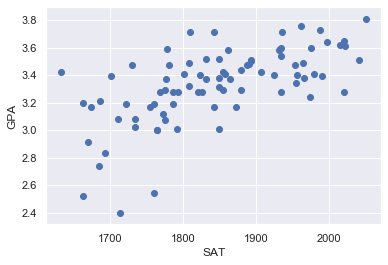

In [4]:
# Explore the data
plt.scatter(x1,y)
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.show()

In [18]:
# Regression itself
x= sm.add_constant(x1)
results= sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           7.20e-11
Time:                        22:49:42   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

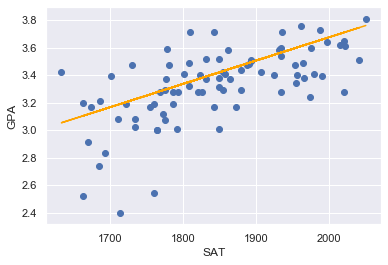

In [5]:
plt.scatter(x1,y)
yhat= 0.0017*x1+ 0.275
fig= plt.plot(x1,yhat,color='orange',label='regression line')
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.show()

## Multiple linear regression and Adjusted R-squared

In [2]:
data2= pd.read_csv('1.02. Multiple linear regression.csv')
data2

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
...,...,...,...
79,1936,3.71,3
80,1810,3.71,1
81,1987,3.73,3
82,1962,3.76,1


In [3]:
data2.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


In [4]:
y=data2['GPA']
x1= data2[['SAT','Rand 1,2,3']]

In [5]:
x= sm.add_constant(x1)
results= sm.OLS(y,x).fit()
results.summary()

C:\Users\Njenga\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           6.58e-10
Time:                        18:58:22   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Dummy variables

In [6]:
raw= pd.read_csv('1.03. Dummies.csv')

In [7]:
raw

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [8]:
data= raw.copy()

In [9]:
data['Attendance']= data['Attendance'].map({'Yes':1, 'No':0})

In [10]:
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [11]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


## Regression

In [12]:
y= data['GPA']
x1= data[['SAT','Attendance']]

In [13]:
x= sm.add_constant(x1)
results= sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           2.19e-15
Time:                        21:18:38   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

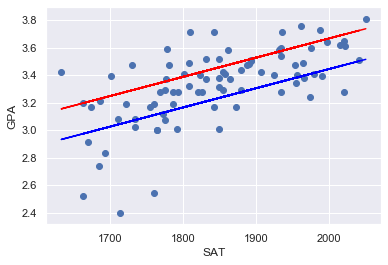

In [14]:
plt.scatter(data['SAT'], y)
yhat_no=0.6439+0.0014*data['SAT']
yhat_yes=0.8665+0.0014*data['SAT']
fig= plt.plot(data['SAT'],yhat_no, color='blue')
fig= plt.plot(data['SAT'],yhat_yes, color='red')
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.show()

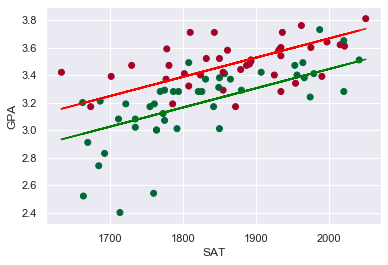

In [18]:
plt.scatter(data['SAT'], y, c= data['Attendance'], cmap='RdYlGn_r')
yhat_no=0.6439+0.0014*data['SAT']
yhat_yes=0.8665+0.0014*data['SAT']
fig= plt.plot(data['SAT'],yhat_no, color='green')
fig= plt.plot(data['SAT'],yhat_yes, color='red')
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.show()

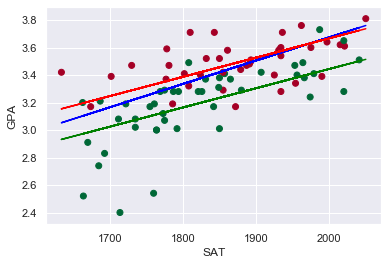

In [17]:
plt.scatter(data['SAT'], y, c= data['Attendance'], cmap='RdYlGn_r')
yhat_no=0.6439+0.0014*data['SAT']
yhat_yes=0.8665+0.0014*data['SAT']
yhat= 0.0017*data['SAT']+0.275
fig= plt.plot(data['SAT'],yhat, color='blue')
fig= plt.plot(data['SAT'],yhat_no, color='green')
fig= plt.plot(data['SAT'],yhat_yes, color='red')
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.show()

## How to make predictions using regressions

In [19]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [20]:
new_data= pd.DataFrame({'const':1, 'SAT':[1700,1670], 'Attendance':[0,1]})
new_data= new_data[['const','SAT','Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [21]:
new_data.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [22]:
predictions= results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [24]:
predictionsdf= pd.DataFrame({'Predictions':predictions})
joined= new_data.join(predictionsdf)
joined.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163
